### <a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Assesment/LaboratorioFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio final.
## Aprendizaje estadístico.

Los siguientes dataset (DataTrain,DataTest)contiene información para entrenar un modelo y realizar la predecicción de la diferencia  del  consumo de combustible en barcos, su tarea será encontrar el mejor modelo que permita determinar la diferencia del contador de flujo de combustible, empleando los datos suministrados en el dataset de nombre DataTest.


La descripcion de los dataset son dadas a continuación:

- El  dataset [DataTrain](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/datasets/DataTrain.xlsx)
 contiene datos para las  variables : Date	Latitude_degree	Longitude_degree	Beaufort	Speed(Ground)	M/E REVOLUTION	M/E F O FLOW COUNTER,  






- El dataset [DataTrainVyg](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/datasets/Data_trainVyg.xlsx)
, contiene datos de Date(UTC)	DRAFT.

- El dataset [DataTest](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/datasets/DataTest.xlsx)
, es el dataset con el que probarás tu modelo después de ser entrenado.

La descripción de las variables son las siguientes:


- Date: Es la fecha en que se registraron los datos

- Latitude_degree: Es la coordenada que indica la posición norte o sur de un punto en la superficie de la Tierra o de otro cuerpo celeste. Se mide en grados, minutos y segundos o en grados decimales, desde el ecuador (0°) hasta los polos (90° o -90°). Por ejemplo, la latitud de Medellín es 6.244° N.

- Longitude_degree: Es la coordenada que indica la posición este o oeste de un punto en la superficie de la Tierra o de otro cuerpo celeste. Se mide en grados, minutos y segundos o en grados decimales, desde el meridiano de Greenwich (0°) hasta los antimeridianos (180° o -180°). Por ejemplo, la longitud de Medellín es 75.574° W.


- Beaufort: Es una escala que mide la intensidad del viento basándose en el estado del mar o en los efectos del viento sobre la superficie terrestre. Tiene 13 niveles, desde 0 (calma) hasta 12 (huracán). Por ejemplo, un viento de fuerza 5 en la escala de Beaufort tiene una velocidad de 29 a 38 km/h y produce olas moderadas.


- Speed(Ground): Es la velocidad a la que se desplaza un objeto sobre la superficie terrestre, normalmente en kilómetros por hora (km/h) o en nudos (kt). Por ejemplo, la velocidad de un avión comercial puede ser de unos 900 km/h o 486 kt.


- M/E REVOLUTION : Es la velocidad angular o número de revoluciones por minuto (rpm) de un motor eléctrico o de una máquina. Por ejemplo, un motor eléctrico puede tener una velocidad de 1800 rpm.


- DRAFT: Es la profundidad vertical de un barco o de otro objeto flotante desde la línea de flotación hasta el fondo de la quilla. Se mide normalmente en metros (m) o en pies (ft). Por ejemplo, el calado de un portaaviones puede ser de unos 12 m o 39 ft.


- M/E F O FLOW COUNTER: Es el contador que mide el flujo de combustible (fuel oil) que entra o sale de un motor eléctrico o de una máquina. Por ejemplo, un contador puede registrar que un motor consume 10 litros de combustible por hora.



**IMPORTAMOS LAS LIBRERÍAS**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

**LEEMOS LOS DATOS Y LOS EMPEZAMOS A CONVERTIR EN DATAFRAMES**

In [2]:
train = pd.read_excel('DataTrain.xlsx')
train2 = pd.read_excel('Data_trainVyg.xlsx')
test = pd.read_excel('DataTest.xlsx')

df_t= pd.DataFrame(train)
df_t

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,2531274
1,2016-06-03 02:00:00,35.315833,141.884444,medium,18.3,86,2531443
2,2016-06-03 03:00:00,35.458333,142.121111,medium,18.4,86,2531608
3,2016-06-03 04:00:00,35.573611,142.548611,medium,18.1,86,2531771
4,2016-06-03 05:00:00,35.939722,142.768889,medium,18.8,86,2531934
...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,low,0.0,0,5165079
19996,2018-11-27 06:00:00,34.750556,137.317778,low,0.0,0,5165079
19997,2018-11-27 07:00:00,34.750833,137.317500,low,0.0,0,5165079
19998,2018-11-27 08:00:00,34.751111,137.317500,low,0.0,0,5165079


**LEEMOS Y CONVERTIMOS EN DATA FRAME EL SEGUNDO CONJUNTO DE DATOS DE ENTRENAMIENTO**

In [3]:
df_t1= pd.DataFrame(train2)
df_t1

,vyg,Date(UTC),DRAFT
0,0,2016060301,9.175
1,1,2016062500,9.250
2,2,2016062700,9.365
3,3,2016062901,8.645
4,4,2016070600,7.805
...,...,...,...
106,106,2019042101,7.425
107,107,2019042309,9.335
108,108,2019050700,9.240
109,109,2019052101,7.435


**Modificación del dataframe de train_vyg para que quede con el mismo formato de fecha y eliminamos la columna de vyg**

In [4]:
df_t1['Date'] = pd.to_datetime(df_t1['Date(UTC)'], format='%Y%m%d%H', errors='coerce')
df = df_t1.drop('Date(UTC)', axis=1)
orden=["Date","vyg","DRAFT"]
df = df[orden]
df = df.drop('vyg',axis=1)
df

,Date,DRAFT
0,2016-06-03 01:00:00,9.175
1,2016-06-25 00:00:00,9.250
2,2016-06-27 00:00:00,9.365
3,2016-06-29 01:00:00,8.645
4,2016-07-06 00:00:00,7.805
...,...,...
106,2019-04-21 01:00:00,7.425
107,2019-04-23 09:00:00,9.335
108,2019-05-07 00:00:00,9.240
109,2019-05-21 01:00:00,7.435


**Ponemos un límite de fecha para poder unir este dataframe con el grade de datos de entrenamiento**

In [5]:
df = df[df['Date'] <= '2018-11-27']
df

,Date,DRAFT
0,2016-06-03 01:00:00,9.175
1,2016-06-25 00:00:00,9.250
2,2016-06-27 00:00:00,9.365
3,2016-06-29 01:00:00,8.645
4,2016-07-06 00:00:00,7.805
...,...,...
86,2018-09-29 00:00:00,9.385
87,2018-10-20 00:00:00,9.475
88,2018-10-26 00:00:00,9.420
89,2018-10-29 00:00:00,8.720


**Se unen los dos dataframes de entrenamiento**

In [6]:
datos = pd.merge(df_t, df, on='Date',how='left')
datos

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,DRAFT
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,2531274,9.175
1,2016-06-03 02:00:00,35.315833,141.884444,medium,18.3,86,2531443,NaN
2,2016-06-03 03:00:00,35.458333,142.121111,medium,18.4,86,2531608,NaN
3,2016-06-03 04:00:00,35.573611,142.548611,medium,18.1,86,2531771,NaN
4,2016-06-03 05:00:00,35.939722,142.768889,medium,18.8,86,2531934,NaN
...,...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,low,0.0,0,5165079,NaN
19996,2018-11-27 06:00:00,34.750556,137.317778,low,0.0,0,5165079,NaN
19997,2018-11-27 07:00:00,34.750833,137.317500,low,0.0,0,5165079,NaN
19998,2018-11-27 08:00:00,34.751111,137.317500,low,0.0,0,5165079,NaN


**Se verifica que sean la cantidad de Nan que en teoría deberíamos tener, esto por el número de filas del dataframe pequeño de entrenamiento**

In [7]:
datos.isna().sum()

Date                        0
Latitude_degree             0
Longitude_degree            0
Beaufort                    0
Speed(Ground)               0
M/E REVOLUTION              0
M/E F O FLOW COUNTER        0
DRAFT                   19909
dtype: int64

**Se llenan los Nan con los valores inmediatamente superiores al dato vacío**

In [8]:
datos.fillna(method='ffill', inplace=True)
datos

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,DRAFT
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,2531274,9.175
1,2016-06-03 02:00:00,35.315833,141.884444,medium,18.3,86,2531443,9.175
2,2016-06-03 03:00:00,35.458333,142.121111,medium,18.4,86,2531608,9.175
3,2016-06-03 04:00:00,35.573611,142.548611,medium,18.1,86,2531771,9.175
4,2016-06-03 05:00:00,35.939722,142.768889,medium,18.8,86,2531934,9.175
...,...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,low,0.0,0,5165079,7.610
19996,2018-11-27 06:00:00,34.750556,137.317778,low,0.0,0,5165079,7.610
19997,2018-11-27 07:00:00,34.750833,137.317500,low,0.0,0,5165079,7.610
19998,2018-11-27 08:00:00,34.751111,137.317500,low,0.0,0,5165079,7.610


**Se analiza el dataframe obtenido finalmente**

In [9]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  20000 non-null  datetime64[ns]
 1   Latitude_degree       20000 non-null  float64       
 2   Longitude_degree      20000 non-null  float64       
 3   Beaufort              20000 non-null  object        
 4   Speed(Ground)         20000 non-null  float64       
 5   M/E REVOLUTION        20000 non-null  int64         
 6   M/E F O FLOW COUNTER  20000 non-null  int64         
 7   DRAFT                 20000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.4+ MB


In [10]:
datos['Beaufort'].unique()

array(['medium', 'low', 'high'], dtype=object)

In [11]:
cols = ["Latitude_degree", "Longitude_degree", "Speed(Ground)", "M/E REVOLUTION", "M/E F O FLOW COUNTER","DRAFT","Beaufort"]
datos.groupby([cols[6]]).mean()

<ipython-input-11-4bf1d74946e9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datos.groupby([cols[6]]).mean()


,Latitude_degree,Longitude_degree,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,DRAFT
Beaufort,,,,,,
high,39.434140,38.932419,14.042097,77.500000,4.237242e+06,8.926169
low,30.301163,-37.676476,11.846119,58.131570,3.838454e+06,8.658127
medium,34.822515,-27.209696,15.767512,78.366416,3.917099e+06,8.711523


**Histogramas de las columnas**

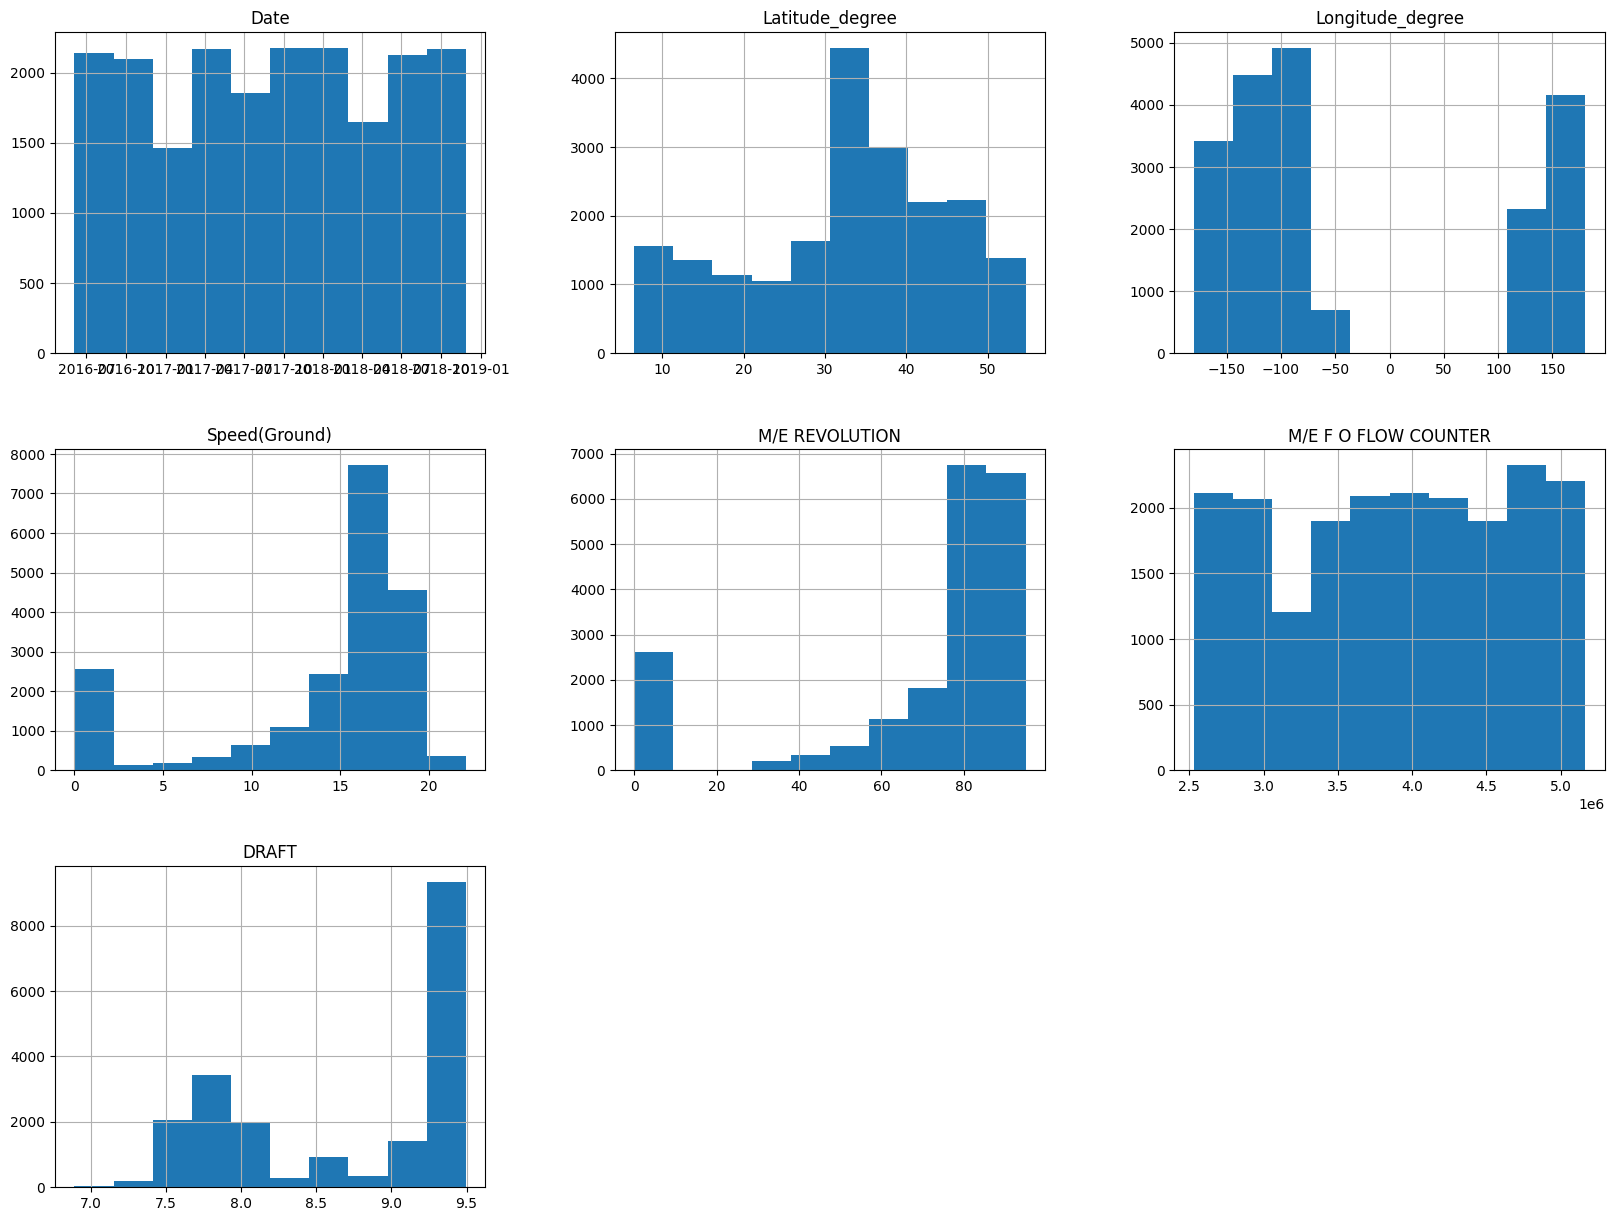

In [12]:
datos.hist(figsize=(20,15))
plt.show()

**Diagrama de caja**

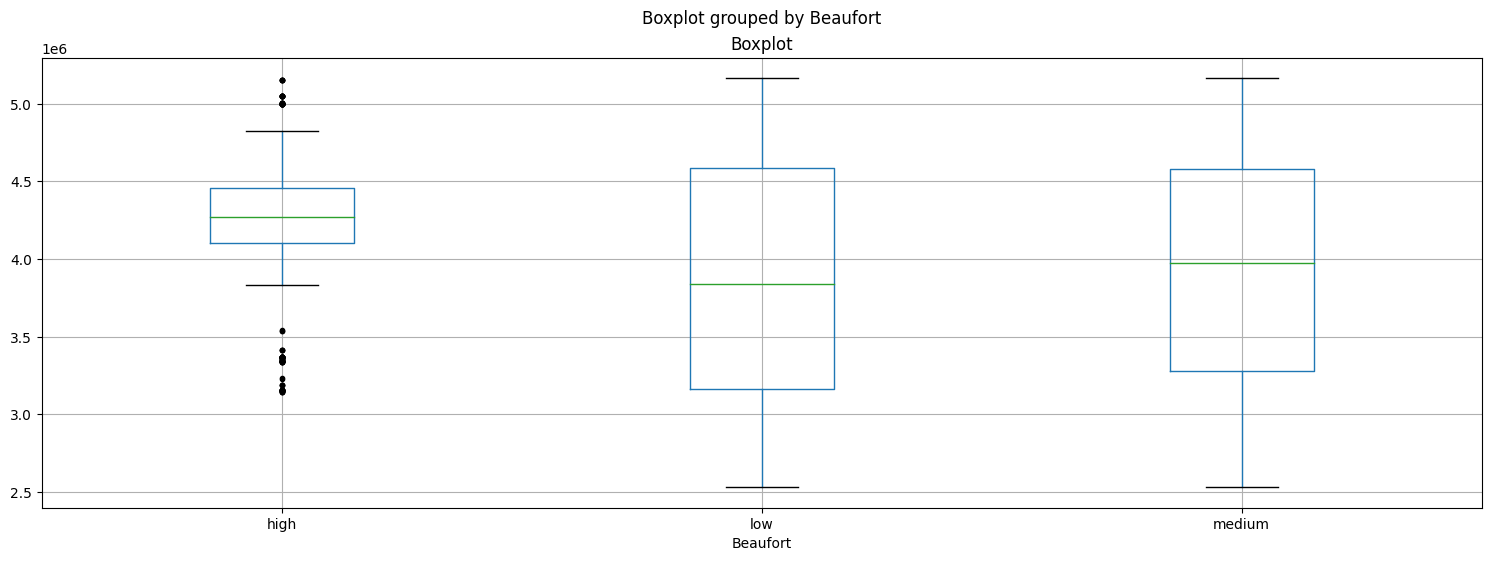

In [13]:
# draw boxplot
datos.boxplot(column="M/E F O FLOW COUNTER", by='Beaufort', sym = 'k.', figsize=(18,6))
# set title
plt.title('Boxplot')
plt.show()

**Matriz de correlación para analizar los datos**

<ipython-input-14-94525c98157d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = datos.corr()


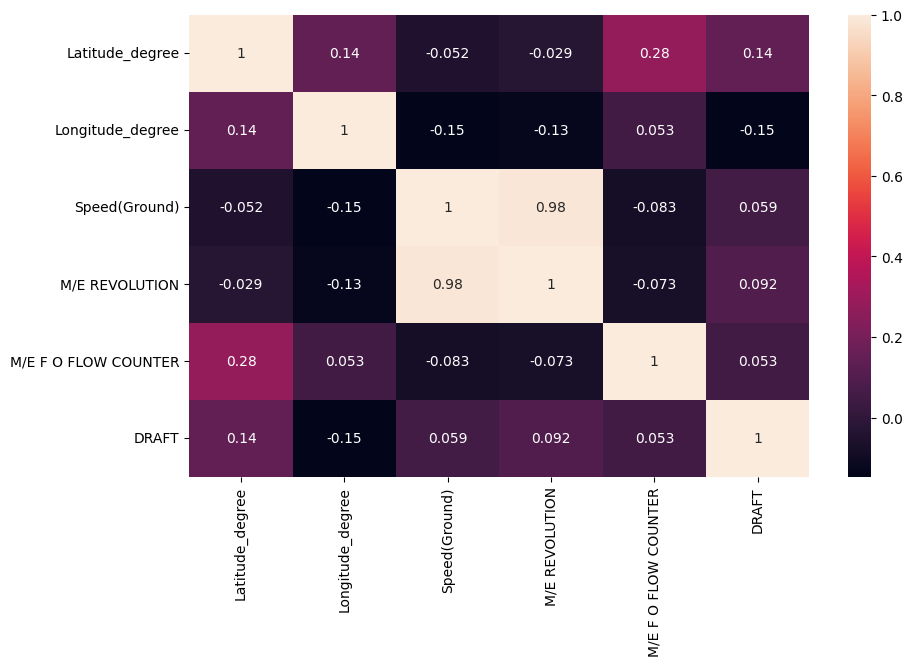

In [14]:
import seaborn as sns
corr_matrix = datos.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True)
plt.show()

**Se leen los datos de test dados y se convierten en un dataframe**

In [15]:
df_test= pd.DataFrame(test)
df_test

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION
0,2018-11-27 10:00:00,34.750556,137.318056,low,0.0,0
1,2018-11-27 11:00:00,34.751111,137.317222,low,0.0,0
2,2018-11-27 12:00:00,34.750556,137.317500,low,0.0,0
3,2018-11-27 13:00:00,34.751389,137.317500,low,0.0,0
4,2018-11-27 14:00:00,34.750833,137.317500,low,0.0,0
...,...,...,...,...,...,...
4424,2019-06-02 19:00:00,33.175278,-132.280278,medium,17.9,92
4425,2019-06-02 20:00:00,33.053056,-131.792500,medium,17.8,91
4426,2019-06-02 21:00:00,33.093333,-131.602500,medium,17.5,91
4427,2019-06-02 22:00:00,32.785000,-131.243333,medium,17.5,92


**Se deciden las variables independientes y las variables dependientes**

In [16]:
features = ['Latitude_degree', 'Longitude_degree', 'Beaufort', 'Speed(Ground)', 'M/E REVOLUTION', 'DRAFT']
target = 'M/E F O FLOW COUNTER'

**Se divide el dataframe de entrenamiento en datos de prueba y en otros datos de entrenamiento**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(datos[features], datos[target], test_size=0.2, random_state=42)

**Se propone el modelo para realizar random forest, se hace con Pipeline para no tener problema con la variable categórica Beaufort**

In [18]:
model = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', 'passthrough', ['Latitude_degree', 'Longitude_degree', 'Speed(Ground)', 'M/E REVOLUTION', 'DRAFT']),
            ('cat', OneHotEncoder(sparse=False, drop='first'), ['Beaufort'])
        ]
    )),
    ('regressor', RandomForestRegressor(n_estimators=500, random_state=72))  # Utilizando RandomForestRegressor
])

In [19]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Latitude_degree',
                                                   'Longitude_degree',
                                                   'Speed(Ground)',
                                                   'M/E REVOLUTION', 'DRAFT']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Beaufort'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=500, random_state=72))])

**Se hace la predicción con los datos de test generados**

In [20]:
y_pred = model.predict(X_test)

**Se realiza un gráfico de los datos predichos y los datos de test para mirar el funcionamiento de la regresión**

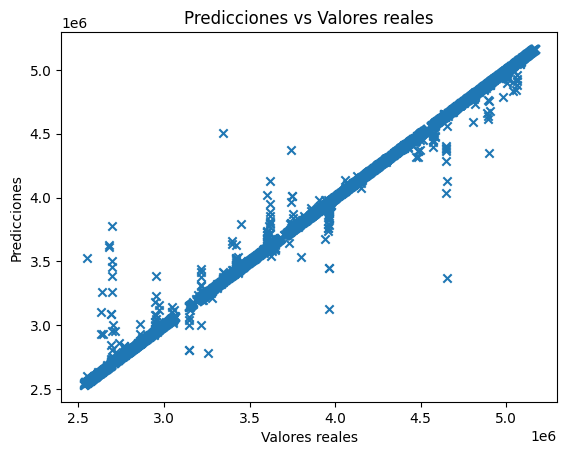

In [21]:
plt.scatter(y_test, y_pred,marker='x')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.show()

**Se vuelve a tomar el dataframe pequeño de entrenamiento para modificarlo y unirlo al de los datos de test entregados**

In [22]:
df_t1

,vyg,Date(UTC),DRAFT,Date
0,0,2016060301,9.175,2016-06-03 01:00:00
1,1,2016062500,9.250,2016-06-25 00:00:00
2,2,2016062700,9.365,2016-06-27 00:00:00
3,3,2016062901,8.645,2016-06-29 01:00:00
4,4,2016070600,7.805,2016-07-06 00:00:00
...,...,...,...,...
106,106,2019042101,7.425,2019-04-21 01:00:00
107,107,2019042309,9.335,2019-04-23 09:00:00
108,108,2019050700,9.240,2019-05-07 00:00:00
109,109,2019052101,7.435,2019-05-21 01:00:00


In [23]:
df_test_1 = df_t1.drop('Date(UTC)', axis=1)
df_test_1 = df_test_1.drop('vyg',axis=1)
df_test_1

,DRAFT,Date
0,9.175,2016-06-03 01:00:00
1,9.250,2016-06-25 00:00:00
2,9.365,2016-06-27 00:00:00
3,8.645,2016-06-29 01:00:00
4,7.805,2016-07-06 00:00:00
...,...,...
106,7.425,2019-04-21 01:00:00
107,9.335,2019-04-23 09:00:00
108,9.240,2019-05-07 00:00:00
109,7.435,2019-05-21 01:00:00


In [24]:
orden_1=["Date","DRAFT"]
df_test_1 = df_test_1[orden_1]
df_test_1

,Date,DRAFT
0,2016-06-03 01:00:00,9.175
1,2016-06-25 00:00:00,9.250
2,2016-06-27 00:00:00,9.365
3,2016-06-29 01:00:00,8.645
4,2016-07-06 00:00:00,7.805
...,...,...
106,2019-04-21 01:00:00,7.425
107,2019-04-23 09:00:00,9.335
108,2019-05-07 00:00:00,9.240
109,2019-05-21 01:00:00,7.435


**Dataframe final de los datos de train que se unirá a los de test**

In [25]:
df_test_1 = df_test_1[df_test_1['Date'] >= '2018-11-27']
df_test_1

,Date,DRAFT
91,2018-11-28 00:00:00,9.460
92,2018-12-15 00:00:00,8.175
93,2019-01-02 00:00:00,7.345
94,2019-01-04 00:00:00,7.340
95,2019-01-18 01:00:00,7.430
96,2019-01-21 00:00:00,9.310
97,2019-02-11 00:00:00,9.220
98,2019-02-16 00:00:00,9.150
99,2019-02-19 00:00:00,8.430
100,2019-02-25 00:00:00,7.610


**Se unen el dataframe de test con el de train pequeño ya organizado**

In [26]:
datos_1= pd.merge(df_test, df_test_1,on='Date',how='left')

In [27]:
datos_1['DRAFT']=datos['DRAFT']
datos_1

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT
0,2018-11-27 10:00:00,34.750556,137.318056,low,0.0,0,9.175
1,2018-11-27 11:00:00,34.751111,137.317222,low,0.0,0,9.175
2,2018-11-27 12:00:00,34.750556,137.317500,low,0.0,0,9.175
3,2018-11-27 13:00:00,34.751389,137.317500,low,0.0,0,9.175
4,2018-11-27 14:00:00,34.750833,137.317500,low,0.0,0,9.175
...,...,...,...,...,...,...,...
4424,2019-06-02 19:00:00,33.175278,-132.280278,medium,17.9,92,9.370
4425,2019-06-02 20:00:00,33.053056,-131.792500,medium,17.8,91,9.370
4426,2019-06-02 21:00:00,33.093333,-131.602500,medium,17.5,91,9.370
4427,2019-06-02 22:00:00,32.785000,-131.243333,medium,17.5,92,9.370


**Se realiza la predicción haciendo uso del dataframe obtenido de datos de test y se meten en un dataframe con la fecha**

In [28]:
pred = model.predict(datos_1[features])
pred =pd.DataFrame(pred,columns=['M/E F O FLOW COUNTER'])
prediccion = pd.concat([datos_1['Date'],pred],axis=1)
prediccion

,Date,M/E F O FLOW COUNTER
0,2018-11-27 10:00:00,2.808586e+06
1,2018-11-27 11:00:00,2.740784e+06
2,2018-11-27 12:00:00,2.752202e+06
3,2018-11-27 13:00:00,2.752202e+06
4,2018-11-27 14:00:00,2.752202e+06
...,...,...
4424,2019-06-02 19:00:00,3.193018e+06
4425,2019-06-02 20:00:00,3.194588e+06
4426,2019-06-02 21:00:00,3.194239e+06
4427,2019-06-02 22:00:00,3.195074e+06
